<a href="https://colab.research.google.com/github/DanyloVanin/PercussionHero_BreatheInTheAI/blob/main/PercussionHero_Splitting_and_Spectogram_Melscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources


# Initial configuration

1. Import libraries
1. Mount Google Drive folder with data using `Files -> Google Drive` option
2. Change from `.m4a` into `.wav`
4. Create several versions of audio with small shifts (e.g. `100 ms`)
3. Split into chunks (approx. 1 sec)
4. Change frame_rate from `48 000` to `16 000`
5. Split 2 channel audio into separate mono audio

In [1]:
# Last TensorFlow version is used for some of the functionality 
%pip install -U --pre tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.0 kB/s 
     |████████████████████████████████| 439 kB 71.7 MB/s 
     |████████████████████████████████| 6.0 MB 60.9 MB/s 
     |████████████████████████████████| 1.7 MB 63.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [2]:
%pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 1.3 MB/s 
     |████████████████████████████████| 2.4 MB 60.9 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.27.0
    Uninstalling tensorflow-io-gcs-filesystem-0.27.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.27.0


In [3]:
%pip install tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 16.0 MB/s 
     |████████████████████████████████| 1.3 MB 66.4 MB/s 
     |████████████████████████████████| 1.1 MB 56.3 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 352 kB 53.0 MB/s 
     |████████████████████████████████| 5.8 MB 55.1 MB/s 
     |████████████████████████████████| 636 kB 59.1 MB/s 
     |████████████████████████████████| 118 kB 60.0 MB/s 
     |████████████████████████████████| 38.2 MB 1.1 MB/s 
     |████████████████████████████████| 238 kB 53.0 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=613503623ebe9102e12e4df36e9af3b069eb795f2885fed6448bfbce20be02b5
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: pyyaml
    Fo

In [4]:
# PyPi Packet used for audio manipulation
%pip install pydub~=0.25.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os

DATASET_PATH = 'drive/MyDrive/ML/Toronto_PercussionHero/Dataset'
TEMP_DATASET_PATH='sample_data/TempDataset'
PROCESSED_DATASET_PATH = 'sample_data/ProcessedDataset'
CLAPPED_SUBPATH = 'Clapped'
CUPPED_SUBPATH = 'Cupped'

CLAPPED_REMOTE_DATASET_PATH = os.path.join(DATASET_PATH, CLAPPED_SUBPATH)
CUPPED_REMOTE_DATASET_PATH = os.path.join(DATASET_PATH, CUPPED_SUBPATH)

CLAPPED_TEMP_DATASET_PATH = os.path.join(TEMP_DATASET_PATH, CLAPPED_SUBPATH)
CUPPED_TEMP_DATASET_PATH = os.path.join(TEMP_DATASET_PATH, CUPPED_SUBPATH)

CLAPPED_PROCESSED_DATASET_PATH = os.path.join(PROCESSED_DATASET_PATH, CLAPPED_SUBPATH)
CUPPED_PROCESSED_DATASET_PATH = os.path.join(PROCESSED_DATASET_PATH, CUPPED_SUBPATH)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Convert dataset from .m4a to .wav

In [7]:
# Convert to WAV function
import os
from pydub import AudioSegment 

def convert_to_wav(input_dir, output_dir):
  print(f"Converting files in {input_dir} to wav. Output dir: {output_dir}")
  if not os.path.exists(output_dir):
    print(f"Creating directory at {output_dir}")
    os.makedirs(output_dir)

  for subdir, dirs, files in os.walk(input_dir):
    for file in files:
      filename = os.path.splitext(file)[0]
      new_filename = filename.replace('\.m4a', '\.wav')
      abs_path = os.path.abspath(os.path.join(input_dir, file))
      track = AudioSegment.from_file(abs_path,  format= 'm4a')
      file_handle = track.export(os.path.join(output_dir, new_filename), format='wav')
      print(f"--\tConverted {filename}")
      

In [8]:
convert_to_wav(CLAPPED_REMOTE_DATASET_PATH, CLAPPED_TEMP_DATASET_PATH)
convert_to_wav(CUPPED_REMOTE_DATASET_PATH, CUPPED_TEMP_DATASET_PATH)

Converting files in drive/MyDrive/ML/Toronto_PercussionHero/Dataset/Clapped to wav. Output dir: sample_data/TempDataset/Clapped
Creating directory at sample_data/TempDataset/Clapped
--	Converted P3_clapped_anterior
--	Converted p5_clapped_anterior
--	Converted P6_clapped_anterior
--	Converted P2_clapped_anterior
--	Converted P4_clapped_anterior
--	Converted P1_clapped_anterior
Converting files in drive/MyDrive/ML/Toronto_PercussionHero/Dataset/Cupped to wav. Output dir: sample_data/TempDataset/Cupped
Creating directory at sample_data/TempDataset/Cupped
--	Converted P6_cupped_posterior
--	Converted P2_cupped
--	Converted P3_cupped
--	Converted P1_cupped
--	Converted P4_cupped_anterior
--	Converted P5_cupped_anterior


### Audio track information helper function
(channels, frame_rate, width)

In [9]:
import os
from pydub import AudioSegment 

def get_audio_info(input_dir):
  for subdir, dirs, files in os.walk(input_dir):
    for file in files:
      abs_path = os.path.abspath(os.path.join(input_dir, file))
      track = AudioSegment.from_file(abs_path,  format= 'wav')
      print('========')
      print(f"File: {file}")
      print(f"Frame rate: {track.frame_rate}")
      print(f"Channels: {track.channels}")
      print(f"Width: {track.sample_width }")
      print(track.frame_rate)


In [10]:
get_audio_info('sample_data/TempDataset/Clapped/')

File: p5_clapped_anterior
Frame rate: 48000
Channels: 2
Width: 2
48000
File: P2_clapped_anterior
Frame rate: 48000
Channels: 1
Width: 2
48000
File: P1_clapped_anterior
Frame rate: 48000
Channels: 1
Width: 2
48000
File: P6_clapped_anterior
Frame rate: 48000
Channels: 2
Width: 2
48000
File: P3_clapped_anterior
Frame rate: 48000
Channels: 2
Width: 2
48000
File: P4_clapped_anterior
Frame rate: 48000
Channels: 2
Width: 2
48000


### Main processing helper function


*   Converts `.m4a` to `.wav`
*   Sets sample rate to `16000`
*   Splits multiple channels into separate audio
*   Splits each audio into 1000 ms chunks
*   Saves all chunks into specified folder



In [11]:
from pydub import AudioSegment 
from pydub.utils import make_chunks


def save(chunks, output_dir, output_file, channel_n, shift):
  out = os.path.join(output_dir, output_file)
  print(f"--\tSaving chunks for {out}")
  for i, audio_chunk in enumerate(chunks): 
    chunk_name = out + f"_channel{channel_n}_shift{shift}_{i}.wav"
    audio_chunk.export(chunk_name, format="wav") 

# Splits audio into chunks of constant length. Result is augmented by starting from different timesteps, with the step of shift_step_ms.
def split_file_into_chunks(input_file, output_file, chunk_length_ms=1000, output_dir='./sample_data/chunked_audio/', shift_step_ms=50):
  
  full_audio = AudioSegment.from_file(input_file, format="wav") 
  # Set sample rate
  full_audio = full_audio.set_frame_rate(16000)
  # Split to mono
  for j in range(int(chunk_length_ms/shift_step_ms)):
    shifted_audio = full_audio[j*shift_step_ms:]
    if shifted_audio.channels > 1:
      splitted_audio=shifted_audio.split_to_mono()
      for channel in range(len(splitted_audio)):
        chunks = make_chunks(splitted_audio[channel], chunk_length_ms)
        save(chunks=chunks, output_dir=output_dir, output_file=output_file, channel_n=channel, shift=j*shift_step_ms)
    else: 
      chunks = make_chunks(shifted_audio, chunk_length_ms)
      save(chunks=chunks, output_dir=output_dir, output_file=output_file, channel_n=0, shift=j*shift_step_ms)


In [12]:
import os

def split_files_into_chunks(input_dir, output_dir):
  for subdir, dirs, files in os.walk(input_dir):
    for file in files:
        filename = os.path.splitext(file)[0]
        abs_path = os.path.abspath(os.path.join(input_dir, file))
        print(f"Splitting {abs_path}.\t\tOutput dir: {output_dir}")
        split_file_into_chunks(abs_path, output_file=filename, chunk_length_ms=1000, output_dir=output_dir)

clapped_out_dir = CLAPPED_PROCESSED_DATASET_PATH
cupped_out_dir = CUPPED_PROCESSED_DATASET_PATH
print(f"clapped={clapped_out_dir}, cupped={cupped_out_dir}")

# Create dicrectory if not exists
if not os.path.exists(clapped_out_dir):
    os.makedirs(clapped_out_dir)

if not os.path.exists(cupped_out_dir):
    os.makedirs(cupped_out_dir)

# Split dataset files into chunks
split_files_into_chunks(input_dir=CLAPPED_TEMP_DATASET_PATH, output_dir=clapped_out_dir)
split_files_into_chunks(input_dir=CUPPED_TEMP_DATASET_PATH,  output_dir=cupped_out_dir)

clapped=sample_data/ProcessedDataset/Clapped, cupped=sample_data/ProcessedDataset/Cupped
Splitting /content/sample_data/TempDataset/Clapped/p5_clapped_anterior.		Output dir: sample_data/ProcessedDataset/Clapped
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving chunks for sample_data/ProcessedDataset/Clapped/p5_clapped_anterior
--	Saving

### Directory cleaner helper function

In [13]:
import os
#os.system(f'rm -rf sample_data/TempDataset/')

In [14]:
import os

def clean_directory(directory):
  os.system(f'rm -rf {directory}/*')

def count_files_in_folder(directory):
  count = 0
  for path in os.listdir(directory):
      # check if current path is a file
      if os.path.isfile(os.path.join(directory, path)):
          count += 1
  print(f'Files in {directory}: ', count)
  return

count_files_in_folder(CLAPPED_PROCESSED_DATASET_PATH)
count_files_in_folder(CUPPED_PROCESSED_DATASET_PATH)
#os.system(f'rm -rf {CLAPPED_TEMP_DATASET_PATH}')
#os.system(f'rm -rf {CUPPED_TEMP_DATASET_PATH}')

# clean_directory('sample_data/Dataset/Clapped')
# clean_directory('sample_data/Dataset/Cupped')
os.system('rm -rf sample_data/Dataset/Cupped/.ipynb_checkpoints')
os.system('rm -rf sample_data/Dataset/Clapped/.ipynb_checkpoints')

Files in sample_data/ProcessedDataset/Clapped:  5705
Files in sample_data/ProcessedDataset/Cupped:  6245


0

# Data Processing


1. Import train/test/validation dataset
2. Convert audio to spectogram
3. Convert spectogram to mel-spectogram
4. Conver mel-spectogram to db-scale spectogram
5. Analyze/visualize data

### Imports for Tensorflow


In [15]:
# Import needed libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_models as tfm
from IPython import display

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


### Audio file to tensor decoding function
**(can be used for debugging)**

In [16]:
def decode_audio(file_name):
  raw_audio = tf.io.read_file(file_name)
  audio, _ = tf.audio.decode_wav(raw_audio)
  return tf.squeeze(audio, axis=-1)

In [17]:
def decode_audio_in_dir(dataset_dir):
  for subdir, dirs, files in os.walk(dataset_dir):
      for file in files:
        abs_path = os.path.abspath(os.path.join(dataset_dir, file))
        try:
          audio_tensor = decode_audio(abs_path)
          print('[+] Success:')
          print(audio_tensor)
        except: 
          print('[-] Fail:')
          print(file)

# decode_audio_in_dir('sample_data/Dataset/Clapped')

In [18]:
# Set seed for reproducible experiments
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

### Getting dataset 

In [19]:
# Delete .ipynb (can be created sometimes in dataset folder)
os.system('rm -rf sample_data/Dataset/.ipynb_checkpoints')

train_dataset, validation_dataset = tf.keras.utils.audio_dataset_from_directory(
    directory=PROCESSED_DATASET_PATH,
    batch_size=64,
    validation_split=0.15,
    seed=SEED,
    output_sequence_length=16000,
    subset='both')

Found 11950 files belonging to 2 classes.
Using 10158 files for training.
Using 1792 files for validation.


In [20]:
labels = ['Clapped', 'Cupped']
#print("Label names:", np.array(validation_dataset.class_names))
print("Element spec:", train_dataset.element_spec)

Element spec: (TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


## Dropping extra axis

In [21]:
# Drop the extra axis

def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_dataset = train_dataset.map(squeeze, tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(squeeze, tf.data.AUTOTUNE)

## Get an input example to play with

In [22]:
for example_audio, example_labels in train_dataset.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)

(64, 16000)
(64,)


## Spectrogram create/plot functions

In [49]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  # spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
  spectrogram = tfio.audio.spectrogram(waveform, nfft=512, window=512, stride=256)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [61]:
def get_db_scale_spectrogram(waveform):
  spectrogram = get_spectrogram(waveform)
  squeezed_spectrogram = tf.squeeze(spectrogram, axis=-1)
  mel_spectrogram = tfio.audio.melscale(squeezed_spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)
  dbscale_mel_spectrogram = tfio.audio.dbscale(mel_spectrogram, top_db=80)
  dbscale_mel_spectrogram = dbscale_mel_spectrogram[..., tf.newaxis]
  return dbscale_mel_spectrogram

In [50]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

## Input information function
* display waveform
* display spectrogram
* provide audioplayer
* display mel-spectrogram
* display db-scale spectrogram

In [59]:
import tensorflow_io as tfio

def get_audio_tensor_information(audio_tensor):
  # Audio listen
  display.display(display.Audio(audio_tensor, rate=16000))

  # Plot structure
  fig, axes = plt.subplots(2, figsize=(12, 8))
  
  # Waveform calculation
  timescale = np.arange(audio_tensor.shape[0])
  axes[0].plot(timescale, audio_tensor.numpy())
  axes[0].set_title('Waveform')
  axes[0].set_xlim([0, 16000])

  # Spectogram plot
  spectrogram = get_spectrogram(audio_tensor)
  plot_spectrogram(spectrogram.numpy(), axes[1])
  axes[1].set_title('Spectrogram')

  plt.show()

  squeezed_spectrogram = tf.squeeze(spectrogram, axis=-1)

  # Convert to mel-spectrogram
  mel_spectrogram = tfio.audio.melscale(
       squeezed_spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)
  plt.figure()
  plt.imshow(tf.math.log(mel_spectrogram).numpy())
  

  # Convert to db scale mel-spectrogram
  dbscale_mel_spectrogram = tfio.audio.dbscale(mel_spectrogram, top_db=80)

  plt.figure()
  plt.imshow(dbscale_mel_spectrogram.numpy())

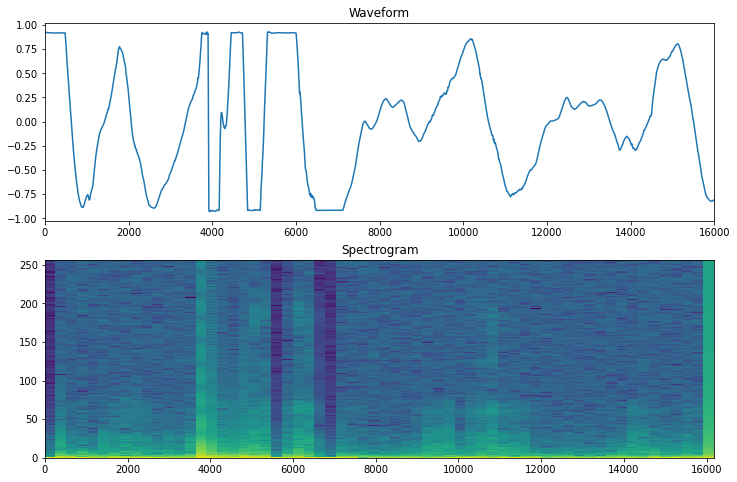

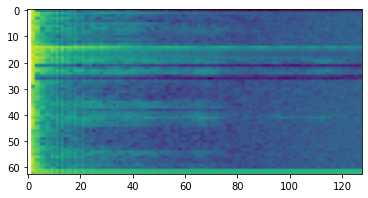

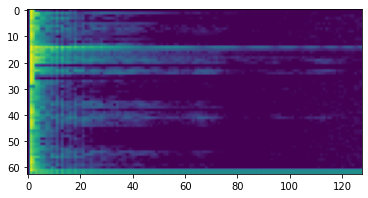

In [60]:
get_audio_tensor_information(example_audio[3])

# Model

## Turning audio datasets into spectrogram datasets

In [62]:
def make_db_scale_spectrogram_dataset(dataset):
  return dataset.map(
      map_func=lambda audio, label: (get_db_scale_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [27]:
def make_spectrogram_dataset(dataset):
  return dataset.map(
      map_func=lambda audio, label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [63]:
test_dataset = validation_dataset.shard(num_shards=2, index=0)
validation_dataset = validation_dataset.shard(num_shards=2, index=1)

In [64]:
train_spectrogram_ds = make_db_scale_spectrogram_dataset(train_dataset)
val_spectrogram_ds = make_db_scale_spectrogram_dataset(validation_dataset)
test_spectrogram_ds = make_db_scale_spectrogram_dataset(test_dataset)

## Displaying some example spectrograms for labels

In [65]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


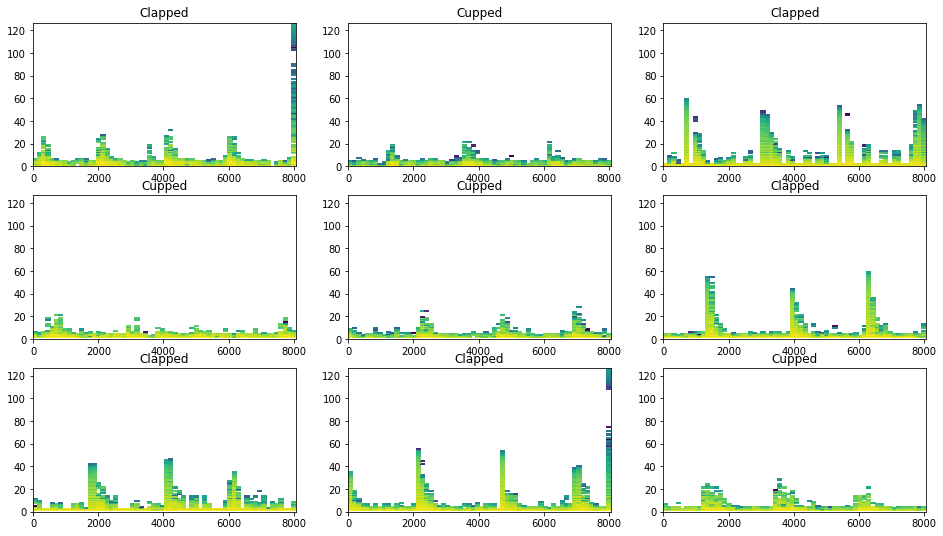

In [66]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(labels[example_spect_labels[i].numpy()])

plt.show()

## Shuffle and imports

In [69]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

In [70]:
from tensorflow.keras import layers
from tensorflow.keras import models

## Model configuration

In [71]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(labels)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(96, 64),
    # Normalize.
    norm_layer,
    layers.Conv2D(4, 3, activation='relu'),
    layers.Conv2D(16, 3, activation='relu'),
    layers.Conv2D(1, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(2, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (63, 128, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 96, 64, 1)         0         
                                                                 
 normalization_1 (Normalizat  (None, 96, 64, 1)        3         
 ion)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 62, 4)         40        
                                                                 
 conv2d_4 (Conv2D)           (None, 92, 60, 16)        592       
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 58, 1)         145       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 29, 1)        0         
 2D)                        

## Model Compile

In [72]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

## Model Fit

In [73]:
EPOCHS = 120
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS
)

Epoch 1/120
159/159 [==============================] - 5s 18ms/step - loss: 0.6414 - accuracy: 0.6450 - val_loss: 0.5865 - val_accuracy: 0.7076
Epoch 2/120
159/159 [==============================] - 1s 8ms/step - loss: 0.5833 - accuracy: 0.7057 - val_loss: 0.5667 - val_accuracy: 0.7188
Epoch 3/120
159/159 [==============================] - 2s 10ms/step - loss: 0.5624 - accuracy: 0.7230 - val_loss: 0.5552 - val_accuracy: 0.7277
Epoch 4/120
159/159 [==============================] - 1s 8ms/step - loss: 0.5503 - accuracy: 0.7288 - val_loss: 0.5390 - val_accuracy: 0.7277
Epoch 5/120
159/159 [==============================] - 1s 7ms/step - loss: 0.5342 - accuracy: 0.7361 - val_loss: 0.5225 - val_accuracy: 0.7344
Epoch 6/120
159/159 [==============================] - 1s 7ms/step - loss: 0.5169 - accuracy: 0.7476 - val_loss: 0.5131 - val_accuracy: 0.7411
Epoch 7/120
159/159 [==============================] - 1s 7ms/step - loss: 0.4990 - accuracy: 0.7586 - val_loss: 0.5008 - val_accuracy: 0.75

In [74]:
modelname = 'dbscale_weights_3_5k_96_64in_2_16out_adam_120epochs'

model.save_weights(os.path.join('weights/', modelname))
model.save_weights(os.path.join('/content/drive/MyDrive/ML/Toronto_PercussionHero/weights/', modelname))

## Plot training history

In [75]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

def plot_training_history(history):
  figure(figsize=(32, 10), dpi=80)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(fname='model_accuraly', format='png')
  plt.show()
  # summarize history for loss
  figure(figsize=(32, 10), dpi=80)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(fname='model_loss', format='png')
  plt.show()

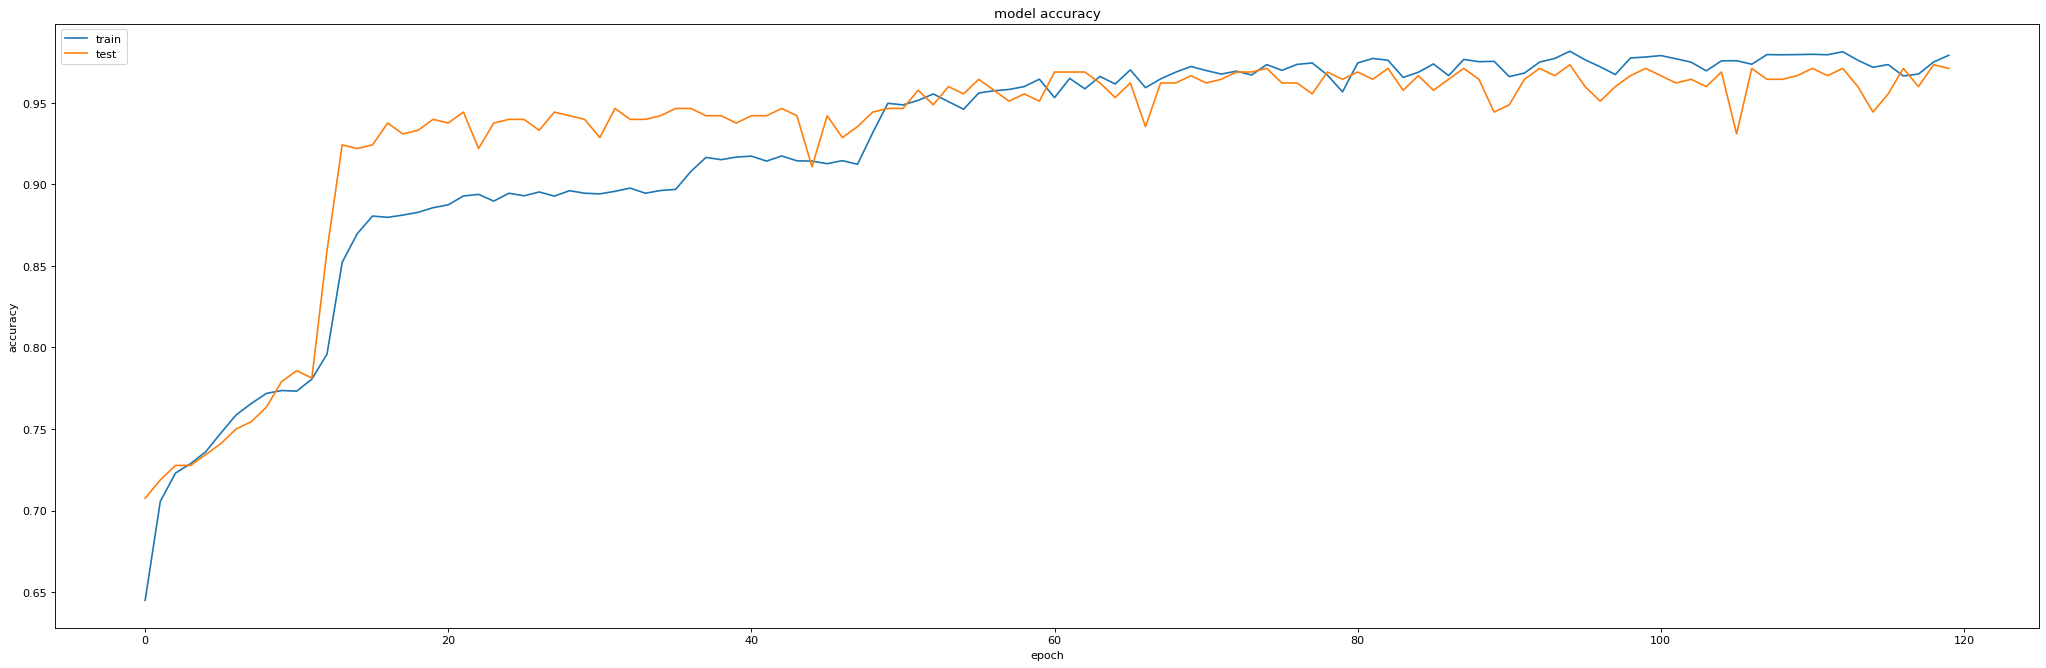

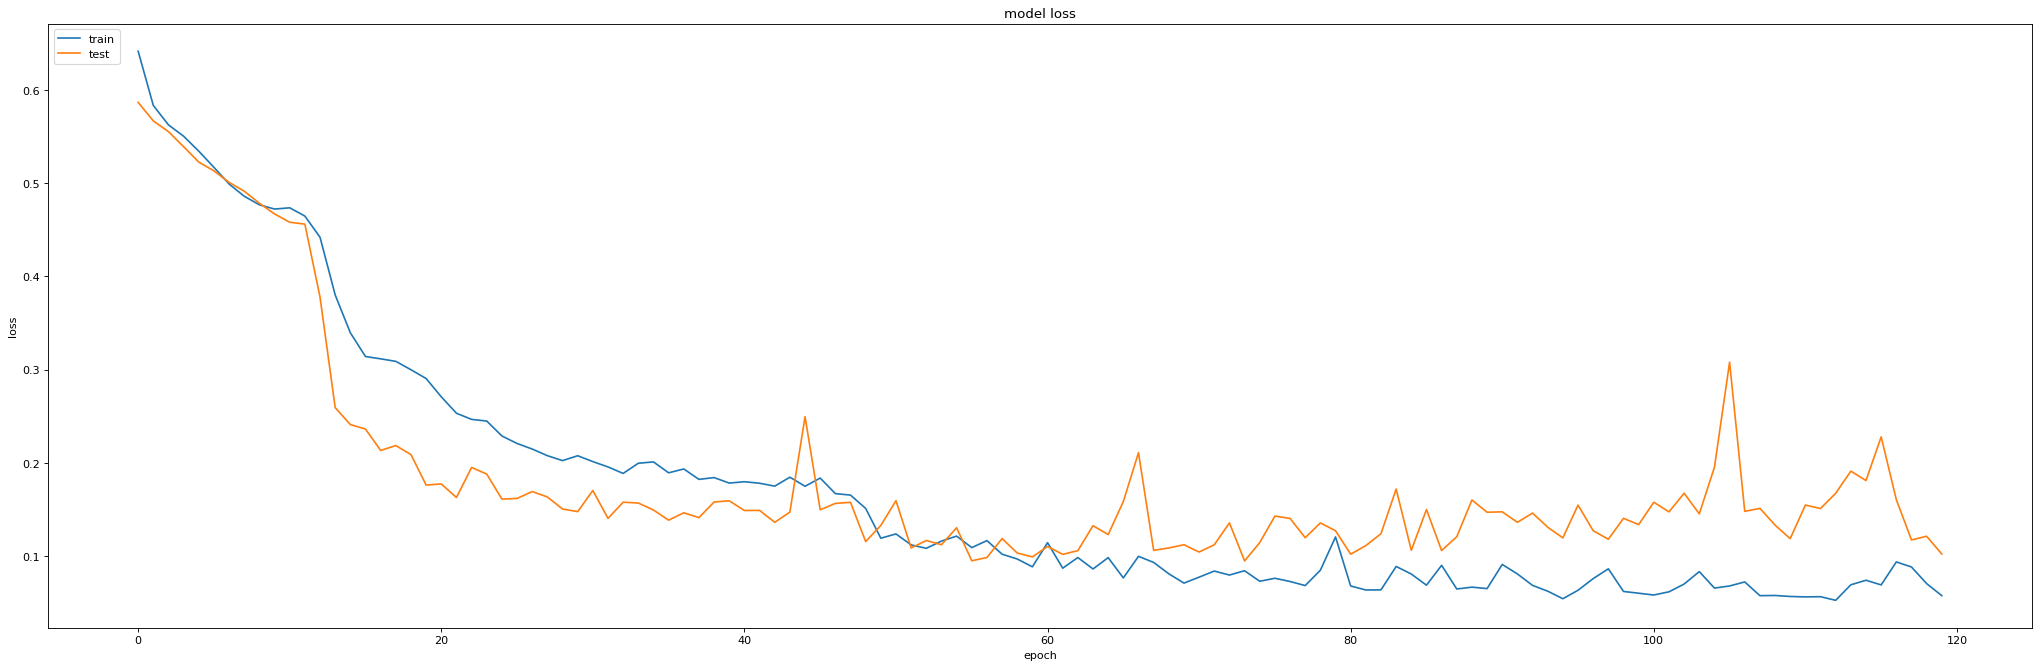

In [76]:
plot_training_history(history)

## Model Evaluate

In [77]:
model.evaluate(test_spectrogram_ds, return_dict=True)

7/7 [==============================] - 1s 143ms/step - loss: 0.2867 - accuracy: 0.9509


{'loss': 0.2866687774658203, 'accuracy': 0.9508928656578064}

## Confusion Matrix

7/7 [==============================] - 0s 3ms/step


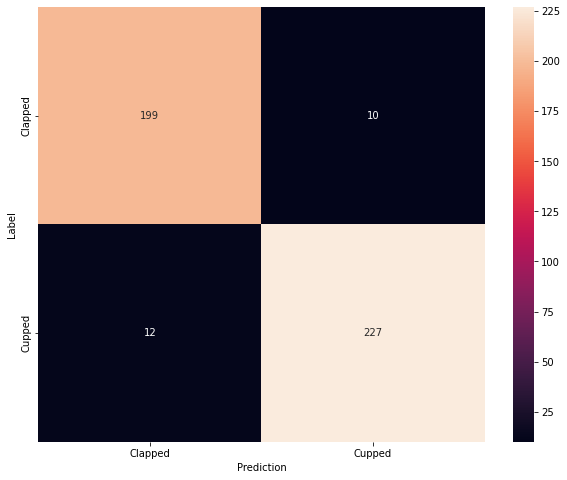

In [78]:
y_pred = model.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()


**Future:**
1. Create data processing pipeline as in [here](https://towardsdatascience.com/how-to-easily-process-audio-on-your-gpu-with-tensorflow-2d9d91360f06)
1. Read series of articles on audio deep learning [here](https://towardsdatascience.com/audio-deep-learning-made-simple-part-3-data-preparation-and-augmentation-24c6e1f6b52)


